# Cuaderno 1: visualización de datos

En este cuaderno vamos a importar la base de datos preparada para usar PPI, y a producir una serie de visualizaciones similares a las de reporte.

## Primero importamos las librerías que usaremos

In [1]:
from matplotlib import pyplot as plt # para hacer gráficos
import pandas as pd # para cargar datos y manipularlos
import numpy as np # para hacer operaciones matemáticas

## Ahora cargamos la base de datos con los indicadores

Recordemos que los indicadores ya han sido limpiados y normalizados, por lo que sus valores están entre 0.1 y 0.9. A la par, los indicadores han sido tratados de modo que un valor a la alza siempre significa una mejora.

In [49]:
datos = pd.read_csv('https://raw.githubusercontent.com/oguerrer/IPP_Lima/main/data/base_final.csv')

In [51]:
# imprimimos los datos
datos

,2012,2013,2014,2015,2016,2017,2018,2019,2020,Código,...,Instrumental a la MML,Instrumental,ODS1,ODS2,ODS meta,Territorio,Abreviatura,control_corrupcion,estado_de_derecho,Meta
0,0.894477,0.898718,0.898566,0.897274,0.898601,0.894791,0.898148,0.896411,0.878320,var1,...,instrumental,1,1,NaN,1.1,Lima Metropolitana,pobr_extre,0.431442,0.385544,0.90000
1,0.783668,0.797354,0.805742,0.812377,0.812014,0.793641,0.794981,0.786403,0.686960,var2,...,instrumental,1,1,NaN,1.2,Lima Metropolitana,pobr_mone,0.431442,0.385544,0.81280
2,0.822925,0.824415,0.823190,0.833073,0.832918,0.835441,0.830271,0.829559,0.827360,var4,...,colateral,1,1,NaN,1.2,Provincia de Lima,nece_basic,0.431442,0.385544,0.85408
3,0.497303,0.482438,0.472533,0.406958,0.483773,0.491411,0.519076,0.555662,0.361600,var5,...,instrumental,1,1,2.0,1.2,Provincia de Lima,prog-alime,0.431442,0.385544,0.90000
4,0.416800,0.404800,0.430400,0.418400,0.418400,0.435200,0.435200,0.428800,0.426160,var6,...,instrumental,1,1,NaN,1.3,Provincia de Lima,segu-pens,0.431442,0.385544,0.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.899962,0.899962,0.899962,0.899962,0.899960,0.899942,0.899941,0.899938,0.899952,var178,...,instrumental,1,16,NaN,16.1,Provincia de Lima,tasa_homi,0.431442,0.385544,0.90000
124,0.412447,0.425600,0.418400,0.405600,0.393600,0.425600,0.420000,0.398400,0.412447,var182,...,instrumental,1,16,NaN,16.1,Provincia de Lima,segu_noche,0.431442,0.385544,0.54760
125,0.198400,0.204800,0.208800,0.204000,0.193600,0.221600,0.240000,0.246400,0.259332,var184,...,colateral,1,16,NaN,16.3,Provincia de Lima,tasa_delito,0.431442,0.385544,0.39280
126,0.383200,0.426400,0.404000,0.374400,0.484800,0.474400,0.487200,0.592800,0.572821,var185,...,colateral,1,16,NaN,16.3,Provincia de Lima,sin_conden,0.431442,0.385544,0.74640


In [52]:
# imprimimos los nombres de las columnas
datos.columns.values

array(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Código', 'Nombre del indicador', 'Nombre', 'Fuente',
       'Unidades', 'Dirección', 'Observaciones', 'Datos faltantes',
       'Periodo inicial', 'Periodo final', 'Máximo', 'Mínimo',
       'Máx teórico', 'Min teórico', 'Meta PNUD', 'Meta MML',
       'Periodo meta', 'Instrumental al territorio',
       'Instrumental a la MML', 'Instrumental', 'ODS1', 'ODS2',
       'ODS meta', 'Territorio', 'Abreviatura', 'control_corrupcion',
       'estado_de_derecho', 'Meta'], dtype=object)

In [53]:
# imprimimos todas las abreviaturas de los indicadores
datos['Abreviatura'].values

array(['pobr_extre', 'pobr_mone', 'nece_basic', 'prog-alime', 'segu-pens',
       'segur_socia', 'segur_integ', 'hogar_servi', 'vivi_prop',
       'titu_prop', 'nume_desa', 'pers_damn', 'pers_afect', 'gasto_vulne',
       'defi_calori', 'desn_croni', 'desn_aguda', 'prev_anemi',
       'muer_direc', 'muer_indire', 'parto_pers', 'parto_inst',
       'mort_neon', 'VIH_total', 'VIH_muje', 'inci_tuber', 'caso_mala',
       'inci_hepat', 'trans_alcoh', 'acci_vial', 'plani_fami',
       'pobl_segur', 'segur_gasto', 'perso_fuma', 'habit_medi',
       'habit_enfer', 'apre2p_compr', 'apre2p_mate', 'apre2s_compr',
       'apre2s_mate', 'prom_estu', 'matr5_educ', 'asist5_educ',
       'doce_publ', 'asist24_educ', 'parid_docen', 'tasa_analfa',
       'escue_luz', 'escue_agua', 'escue_baño', 'prima_inter',
       'secun_inter', 'prima_compu', 'secun_compu', 'doce_supe',
       'doce_incia', 'doce_secu', 'doce_prim', 'victi_femi', 'muje_viole',
       'trata_pers', 'adole_emba', 'muje_sinin', 'muje_d

In [54]:
# imprimimos todas las abreviaturas y sus ODS correspondientes
datos[['Abreviatura', 'ODS1', 'ODS2']].values

array([['pobr_extre', 1, nan],
       ['pobr_mone', 1, nan],
       ['nece_basic', 1, nan],
       ['prog-alime', 1, 2.0],
       ['segu-pens', 1, nan],
       ['segur_socia', 1, nan],
       ['segur_integ', 1, nan],
       ['hogar_servi', 1, 11.0],
       ['vivi_prop', 1, 11.0],
       ['titu_prop', 1, 11.0],
       ['nume_desa', 1, 11.0],
       ['pers_damn', 1, 11.0],
       ['pers_afect', 1, 11.0],
       ['gasto_vulne', 1, nan],
       ['defi_calori', 2, nan],
       ['desn_croni', 2, nan],
       ['desn_aguda', 2, nan],
       ['prev_anemi', 2, nan],
       ['muer_direc', 3, nan],
       ['muer_indire', 3, nan],
       ['parto_pers', 3, nan],
       ['parto_inst', 3, nan],
       ['mort_neon', 3, nan],
       ['VIH_total', 3, nan],
       ['VIH_muje', 3, 5.0],
       ['inci_tuber', 3, nan],
       ['caso_mala', 3, nan],
       ['inci_hepat', 3, nan],
       ['trans_alcoh', 3, nan],
       ['acci_vial', 3, 11.0],
       ['plani_fami', 3, 5.0],
       ['pobl_segur', 3, nan],
      

In [55]:
# creamos una lista con los años en la muestra
anios = list(range(2012, 2021))

# impriminos la lista para confirmar el periodo muestral
anios

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [56]:
# por conveniencia para extrael las series de tiempo, cramos una lista con los años en tipo hilo de caracteres
anios_c = [str(anio) for anio in anios]

# impriminos la lista para confirmar el periodo muestral
anios_c 

['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

## Graficamos series de tiempo de distintos indicadores

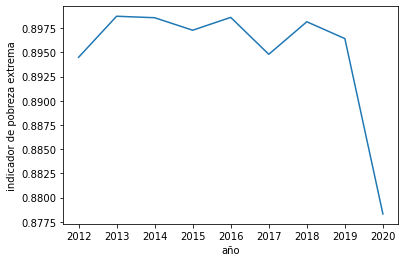

In [109]:
# gráfico de pobreza extrema
x = anios
y = datos[datos['Abreviatura']=='pobr_extre'][anios_c].values[0] # extrae la fila correspondiente a pobr_extre
plt.plot(x, y)
plt.xlabel('año')
plt.ylabel('indicador de pobreza extrema')
plt.show()

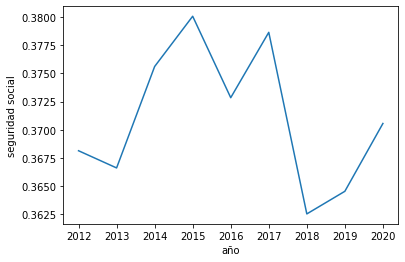

In [110]:
# gráfico de seguridad social
x = anios
y = datos[datos['Abreviatura']=='segur_socia'][anios_c].values[0] # extrae la fila correspondiente a pobr_extre
plt.plot(x, y)
plt.xlabel('año')
plt.ylabel('seguridad social')
plt.show()

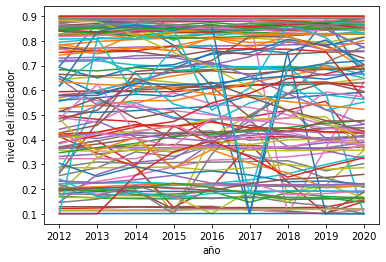

In [111]:
# graficamos todas las series de tiempo
for index, row in datos.iterrows():
    x = anios
    y = row[anios_c]
    plt.plot(x, y)
plt.xlabel('año')
plt.ylabel('nivel del indicador')
plt.show()

In [77]:
# cargamos datos sobre los colores de los ODS
colores = pd.read_csv('https://raw.githubusercontent.com/oguerrer/IPP_Lima/main/data/color_codes.txt', header=None)
colores_ods = dict(zip(colores.index+1, colores.values.flatten()))

# imprimimos la lista de colores
colores_ods

{1: '#E5243B',
 2: '#DDA63A',
 3: '#4C9F38',
 4: '#C5192D',
 5: '#FF3A21',
 6: '#26BDE2',
 7: '#FCC30B',
 8: '#A21942',
 9: '#FD6925',
 10: '#DD1367',
 11: '#FD9D24',
 12: '#BF8B2E',
 13: '#3F7E44',
 14: '#0A97D9',
 15: '#56C02B',
 16: '#00689D',
 17: '#19486A'}

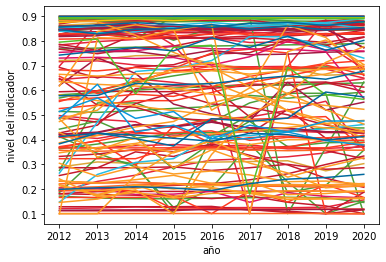

In [112]:
# coloreamos de acuerdo a los ODS
for index, row in datos.iterrows():
    x = anios
    y = row[anios_c]
    ods = row['ODS1']
    plt.plot(x, y, color=colores_ods[ods])
plt.xlabel('año')
plt.ylabel('nivel del indicador')
plt.show()

## Manipulamos los datos para hacer gráficos más intuitivos

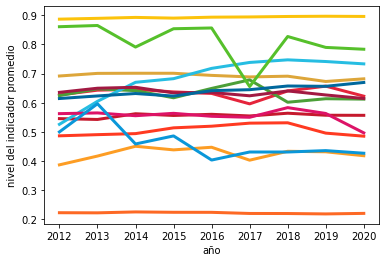

In [113]:
# Promediamos las series a nivel ODS y las graficamos
datos_promedio_ods = datos.groupby('ODS1').mean()

for ods, row in datos_promedio_ods.iterrows():
    x = anios
    y = row[anios_c]
    plt.plot(x, y, color=colores_ods[ods], linewidth=3)
plt.xlabel('año')
plt.ylabel('nivel del indicador promedio')
plt.show()

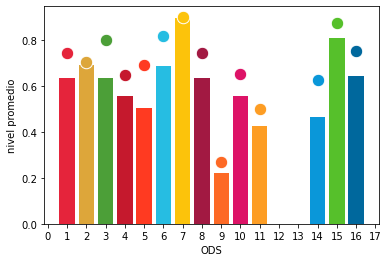

In [120]:
# Hacemos un diagrama de barras a nivel ODS y graficamos la meta promedio
datos_promedio_ods = datos.groupby('ODS1').mean()

for ods, row in datos_promedio_ods.iterrows():
    y = row[anios_c].mean()
    meta = row['Meta']
    plt.bar(ods, y, color=colores_ods[ods], linewidth=3)
    plt.plot(ods, meta, '.', mfc=colores_ods[ods], mec='w', markersize=25)
plt.xlabel('ODS')
plt.ylabel('nivel promedio')
plt.xticks(range(18))
plt.show()

## Analizamos los datos presupuestales

In [91]:
datos_presu = pd.read_csv('https://raw.githubusercontent.com/oguerrer/IPP_Lima/main/data/base_presupuesto.csv')

In [92]:
# Imprimimos los datos presupuestales
datos_presu

,ODS,Entidad,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Lima,5.830314e+07,8.329993e+07,8.415885e+07,7.575229e+07,7.513340e+07,8.211161e+07,8.677139e+07,8.432321e+07,7.874689e+07
1,1,Perú,5.656530e+08,4.648846e+08,7.618005e+08,6.308280e+08,5.189236e+08,5.842510e+08,5.583426e+08,6.423878e+08,1.986153e+09
2,2,Lima,2.143109e+07,2.159298e+07,6.534218e+07,3.638335e+07,3.117798e+07,3.152783e+07,3.816124e+07,3.078324e+07,5.786187e+07
3,2,Perú,5.461341e+07,3.322980e+08,3.111264e+08,3.777803e+08,3.928578e+08,3.870510e+08,3.946368e+08,4.147246e+08,4.228975e+08
4,3,Lima,8.502792e+06,8.276130e+06,1.127229e+07,1.659329e+08,1.716177e+08,1.618648e+08,1.321862e+08,1.590292e+08,1.141168e+08
5,3,Perú,1.009444e+09,1.229868e+09,1.532375e+09,1.724898e+09,1.545259e+09,1.582334e+09,1.792730e+09,1.713313e+09,2.169945e+09
6,4,Lima,1.957613e+07,1.957613e+07,1.957248e+07,1.957613e+07,1.957978e+07,1.957613e+07,1.957613e+07,1.957613e+07,1.957613e+07
7,4,Perú,1.462127e+09,1.713580e+09,2.215624e+09,2.525042e+09,2.462103e+09,2.355309e+09,2.149931e+09,2.253106e+09,2.037303e+09
8,5,Lima,1.166959e+05,1.924487e+05,1.638578e+05,3.702686e+04,5.539080e+04,1.728243e+05,6.943192e+04,1.728243e+05,5.749183e+05
9,5,Perú,5.290492e+07,7.021079e+07,8.179887e+07,8.494340e+07,7.908173e+07,8.556519e+07,9.171552e+07,1.160013e+08,1.093258e+08


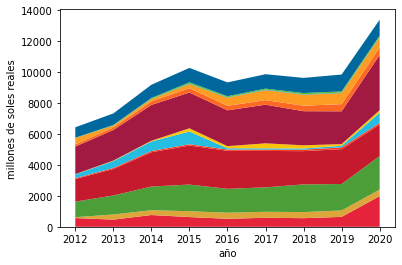

In [118]:
# graficamos el presupuesto obtenido del gasto nacional
datos_presu_peru = datos_presu[datos_presu['Entidad']=='Perú']
x = anios
y = datos_presu_peru[anios_c].values/1000000
colores = [colores_ods[c] for c in datos_presu_peru.ODS]
plt.stackplot(x, y, colors=colores)
plt.xlabel('año')
plt.ylabel('millones de soles reales')
plt.show()

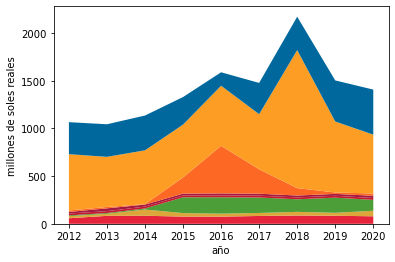

In [119]:
# graficamos el presupuesto obtenido del gasto de lima
datos_presu_lima = datos_presu[datos_presu['Entidad']=='Lima']
x = anios
y = datos_presu_lima[anios_c].values/1000000
colores = [colores_ods[c] for c in datos_presu_lima.ODS]
plt.stackplot(x, y, colors=colores)
plt.xlabel('año')
plt.ylabel('millones de soles reales')
plt.show()